In [110]:
from pydicom import dcmread
from typing import List
import scipy.ndimage
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


array([    0,     1,     2, ..., 65286, 65287, 65288], dtype=uint16)

0

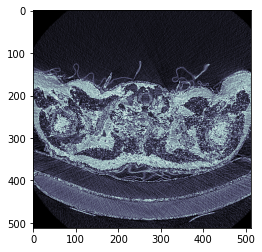

In [109]:

ds_resampled = dcmread(r"Output\dicom\0.dcm")
print(type(ds_resampled.pixel_array))
print(ds_resampled.pixel_array)
plt.imshow(ds_resampled.pixel_array, cmap=plt.cm.bone)
np.unique(ds_resampled.pixel_array)
ds_resampled.PlanarConfiguration

In [111]:
import os
from typing import Tuple
from pydicom import Dataset

def _get_dcm_paths_from_dir(dcm_dir: str) -> List[str]:
    paths = []
    for base, dirs, files in os.walk(dcm_dir):
        for file in files:
            paths.append(os.path.join(base, file))
    return paths

def _read_dcm_dataset(dcm_dir: str) -> Tuple[List[Dataset], np.ndarray]:
    dcm_paths = _get_dcm_paths_from_dir(dcm_dir)
    dcm_dataset = [dcmread(dcm_path) for dcm_path in dcm_paths]
    dcm_spacing = list(map(lambda x : np.float16(x), [*dcm_dataset[0].PixelSpacing, dcm_dataset[0].SliceThickness]))
    # dcm_pixel_array = np.transpose(np.array([dcm_data.pixel_array for dcm_data in dcm_dataset]), (1,2,0))
    dcm_pixel_array = np.array([dcm_data.PixelData for dcm_data in dcm_dataset])

    return dcm_dataset, dcm_spacing, dcm_pixel_array

def _resample_dcm_pixel_array(img: np.ndarray, spacing: List[np.float16], new_spacing: List[np.float16]) -> np.ndarray:
    spacing = np.array(spacing, dtype=np.float16)
    resize_factor = spacing / new_spacing
    new_real_shape = img.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / img.shape
    new_spacing = spacing / real_resize_factor
    # Cubic spline, nearest neighbor for the boundary
    img = scipy.ndimage.interpolation.zoom(img, real_resize_factor, mode="nearest")
    return np.array(img, dtype=np.float16)

In [119]:
dcm_dataset, dcm_spacing, dcm_pixel_array = _read_dcm_dataset('Data/SampleDicom/1393/dicom')
dcm_pixel_array = np.transpose(np.array([dcm_data.pixel_array for dcm_data in dcm_dataset]), (1,2,0))
new_dcm_spacing = [*dcm_spacing[:-1], 1]

In [113]:
dcm_pixel_array.shape

(512, 512, 165)

In [114]:
resampled_dcm_pixel_array = _resample_dcm_pixel_array(dcm_pixel_array, dcm_spacing, new_dcm_spacing)


In [103]:

resampled_dcm_pixel_array_transposed = np.transpose(resampled_dcm_pixel_array, (2,0,1))
resampled_dcm_pixel_array_transposed.shape


(330, 512, 512)

68

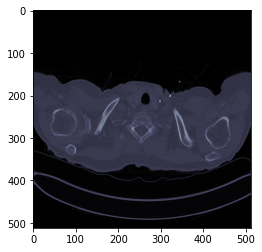

In [85]:
ds1 = dcmread(r'Data\SampleDicom\1393\dicom\1.3.12.2.1107.5.1.4.65305.30000020091412370754200016784.dcm')
ds1.pixel_array.shape
plt.imshow(ds1.pixel_array, cmap=plt.cm.bone)
np.unique(ds1.pixel_array[0])[-1]

In [116]:
np.unique(resampled_dcm_pixel_array_transposed[0]).astype(np.uint16)

array([   0,    1,    2, ..., 4000, 4052, 4092], dtype=uint16)